<h1>Development</h1>
<h3><center>Problem set 2</center></h3>
<br>
<center>Boyao Zhang </center>

<br>
<br>

<h3>Q1.- Praying for Rain: The Welfare Cost of Seasons. </h3>

<h4> Q1.1.- Deterministic seasonality</h4>
<h5>a) Compute the welfare gains of removing the seasonal component from the stream of consumption separately for each degree of seasonality in Table 1.</h5>

In [8]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import itertools as it
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

np.random.seed( 10 )
random.seed(10)

#Setting Parameters
β=0.99
σ=0.2
n=1000
T=40
M=12

#Processes
#Permanent level of consumption
log_u=np.random.normal(0,σ,n)
z = np.zeros((n))
for i in range(n):
    z[i]=np.exp(log_u[i])*np.exp(-σ/2)

#Idiosyncratic non-seasonal stochastic component of consumption
log_e=np.random.normal(0,σ,(n,T))
c = np.zeros((n,T))
for i,t in it.product(range(n),range(T)):
    c[i,t]=np.exp(log_e[i,t])*np.exp(-σ/2)

#Deterministic seasonal component
g_middle=[-0.147, -0.370, 0.141,  0.131, 0.090, 0.058, 0.036, 0.036, 0.036, 0.002, -0.033,  -0.082]
g_high=[-0.293, -0.739, 0.282, 0.262, 0.180, 0.116, 0.072, 0.072, 0.072,0.004,-0.066,-0.164]
g_low=[-0.073, -0.185, 0.071, 0.066, 0.045, 0.029, 0.018, 0.018, 0.018, 0.001, -0.017, -0.041]

#LIFETIME UTILITY FROM CONSUMPTION
c_mt_middle = np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    c_mt_middle[i,m,t]=np.log(z[i]*np.exp(g_middle[m])*c[i,t])

c_mt_high = np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    c_mt_high[i,m,t]=np.log(z[i]*np.exp(g_high[m])*c[i,t])

c_mt_low = np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    c_mt_low[i,m,t]=np.log(z[i]*np.exp(g_low[m])*c[i,t])
    
#LIFETIME UTILITY
w=np.zeros((n,M,T))
β1=np.zeros((T))
for t in range(T):
    β1[t]=pow(β,1/12)**(t*12)
total_β1=np.sum(β1)  
  
β2=np.zeros((M))
for m in range(M):
    β2[m]=pow(β,1/12)**(m-1)
total_β2=np.sum(β2)

a_m=np.zeros((n,T))   
welfare_m=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_m[i,t]=np.sum(β2[m]*c_mt_middle[i,m,t])
            
        welfare_m[i]=np.sum(β1[t]*a_m[i,t])

a_h=np.zeros((n,T))   
welfare_h=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_h[i,t]=np.sum(β2[m]*c_mt_high[i,m,t])
            
        welfare_h[i]=np.sum(β1[t]*a_h[i,t])
    
a_l=np.zeros((n,T))   
welfare_l=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_l[i,t]=np.sum(β2[m]*c_mt_low[i,m,t])
            
        welfare_l[i]=np.sum(β1[t]*a_l[i,t])


#COMPUTE THE WELFARE REMOVING THE SEASONAL COMPONENT
c_t = np.zeros((n,T))
for i,t in it.product(range(n),range(T)):
    c_t[i,t]=np.log(z[i]*c[i,t])       
    
a1=np.zeros((n,T))   
welfare1=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a1[i,t]=np.sum(β2[m]*c_t[i,t])
            
        welfare1[i]=np.sum(β1[t]*a1[i,t])

#Total welfare
total_h=np.sum(welfare_h)  
total_l=np.sum(welfare_l)
total_m=np.sum(welfare_m)
total_ns=np.sum(welfare1)

#Find the Welfare gains            
g_h=np.exp((welfare1-welfare_h)/(total_β2*total_β1)) - 1
g_m=np.exp((welfare1-welfare_m)/(total_β2*total_β1)) - 1
g_l=np.exp((welfare1-welfare_l)/(total_β2*total_β1)) - 1
g_total_h=np.exp((total_ns-total_h)/(total_β2*total_β1))-1
g_total_m=np.exp((total_ns-total_m)/(total_β2*total_β1))-1
g_total_l=np.exp((total_ns-total_l)/(total_β2*total_β1))-1
xx=np.sum(g_m)

import pandas as pd
array=np.array([[round(total_l,2),round(total_m), round(total_h,2), round(total_ns,2)],[round(g_total_l,2),round(g_total_m,2),round(g_total_h,2), '-']])
table1=pd.DataFrame(array, index = ['Welfare', 'Welfare gains'], columns = ['Low', 'Medium', 'High', 'Non-season'])
table1

,Low,Medium,High,Non-season
Welfare,-162.94,-190.0,-245.36,-135.47
Welfare gains,0.07,0.15,0.32,-


<h5> b)Welfare gains of removing the nonseasonal consumption risk </h5>
Now we remove the idiosyncratic non-stationary stochastic component of the consumption (we called c in the previous code). 

In [10]:
c = np.ones((n,T))
c_mt_middle = np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    c_mt_middle[i,m,t]=np.log(z[i]*np.exp(g_middle[m])*c[i,t])

c_mt_high = np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    c_mt_high[i,m,t]=np.log(z[i]*np.exp(g_high[m])*c[i,t])

c_mt_low = np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    c_mt_low[i,m,t]=np.log(z[i]*np.exp(g_low[m])*c[i,t])
    
#LIFETIME UTILITY
w=np.zeros((n,M,T))
β1=np.zeros((T))
for t in range(T):
    β1[t]=pow(β,1/12)**(t*12)
total_β1=np.sum(β1)  
  
β2=np.zeros((M))
for m in range(M):
    β2[m]=pow(β,1/12)**(m-1)
total_β2=np.sum(β2)

a_mc=np.zeros((n,T))   
welfare_mc=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_mc[i,t]=np.sum(β2[m]*c_mt_middle[i,m,t])
            
        welfare_mc[i]=np.sum(β1[t]*a_mc[i,t])

a_hc=np.zeros((n,T))   
welfare_hc=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_hc[i,t]=np.sum(β2[m]*c_mt_high[i,m,t])
            
        welfare_hc[i]=np.sum(β1[t]*a_hc[i,t])
    
a_lc=np.zeros((n,T))   
welfare_lc=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_lc[i,t]=np.sum(β2[m]*c_mt_low[i,m,t])
            
        welfare_lc[i]=np.sum(β1[t]*a_lc[i,t])

total_hc=np.sum(welfare_hc)  
total_lc=np.sum(welfare_lc)
total_mc=np.sum(welfare_mc)

g_hc=np.exp((welfare_hc-welfare_h)/(total_β2*total_β1)) - 1
g_mc=np.exp((welfare_mc-welfare_m)/(total_β2*total_β1)) - 1
g_lc=np.exp((welfare_lc-welfare_l)/(total_β2*total_β1)) - 1
g_total_hc=np.exp((total_hc-total_h)/(total_β2*total_β1))-1
g_total_mc=np.exp((total_mc-total_m)/(total_β2*total_β1))-1
g_total_lc=np.exp((total_lc-total_l)/(total_β2*total_β1))-1

array1=np.array([[round(total_l,2),round(total_m,2), round(total_h,2)],[round(total_lc,2),round(total_mc,2), round(total_hc,2)],[round(g_total_lc,2),round(g_total_mc,2),round(g_total_hc,2)]])
table2=pd.DataFrame(array1, index = ['Welfare', 'Welfare Non-Risk','Welfare Gains'], columns = ['Low', 'Medium', 'High'])
table2

,Low,Medium,High
Welfare,-162.94,-190.41,-245.36
Welfare Non-Risk,-96.43,-123.91,-178.86
Welfare Gains,0.18,0.18,0.18


- The welfare is negatively correlated with the degree of seasonality. 
- Welfare gains are homogeneously distributed across degrees of seasonality. Notice that this make sense: we are substracting same amount for every degree of seasonality. 
- Now, the distribution of welfare across households is not homogenous anymore when comes to households, even if it is homogenous across degrees of seasonality. The distribution follows a Normal one (following the stochastic processes distribution). 

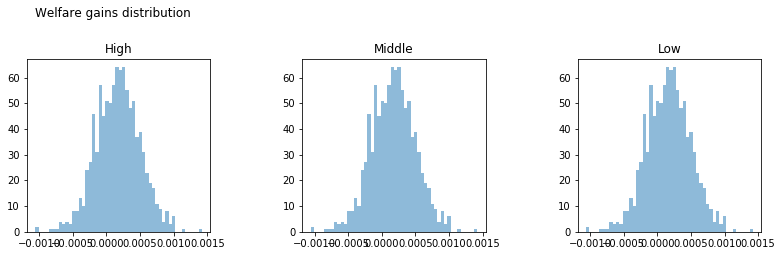

In [11]:
plt.figure
plt.subplots_adjust(top=0.8, bottom=0.2, left=0.3, right=2, wspace=0.5)
plt.suptitle('Welfare gains distribution')
bins=50 #Adjust the number of bins
plt.subplot(1,3,1)
plt.hist(g_hc, bins, alpha=0.5)
plt.title('High')

plt.subplot(1,3,2)
plt.hist(g_mc, bins, alpha=0.5)
plt.title('Middle')

plt.subplot(1,3,3)
plt.hist(g_lc, bins, alpha=0.5)
plt.title('Low')
plt.show()

**Comparison Table 1 - 2**
- The welfare is always negatively correlated with the level of seasonality. 
- Removing the seasonality component increases welfare. The increase is equally distributed across households.
- Removing the non-seasonal risk increases welfare. That increase is heterogenously distributed across household, but homogenously across seasons. 


<br>
<br>
<br>


<h4> Q1.2.- Stochastic seasonal component</h4>
<h5>a) Welfare gains of removing the seasonal component. </h5>

In [11]:
%reset -sf

In [12]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools as it
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

np.random.seed( 10 )
random.seed(10)

#Parameters
β=0.99
σ=0.2
n=1000
T=40
M=12

#Processes
#Permanent level of consumption
log_u=np.random.normal(0,σ,n)
z = np.zeros((n))
for i in range(n):
    z[i]=np.exp(log_u[i])*np.exp(-σ/2)

#Idiosyncratic non-stationary stochastic component
log_e=np.random.normal(0,σ,(n,T))
c = np.zeros((n,T))
for i,t in it.product(range(n),range(T)):
    c[i,t]=np.exp(log_e[i,t])*np.exp(-σ/2)
    

#Seasonal risk
#Deterministic component
g_middle=[-0.147, -0.370, 0.141,  0.131, 0.090, 0.058, 0.036, 0.036, 0.036, 0.002, -0.033,  -0.082]
g_high=[-0.293, -0.739, 0.282, 0.262, 0.180, 0.116, 0.072, 0.072, 0.072,0.004,-0.066,-0.164]
g_low=[-0.073, -0.185, 0.071, 0.066, 0.045, 0.029, 0.018, 0.018, 0.018, 0.001, -0.017, -0.041]

#Stochastic component
s_m=[0.085,0.068,0.290,0.283,0.273,0.273,0.239, 0.205,  0.188,0.188, 0.171,0.137]
s_h=[0.171, 0.137,0.580, 0.567, 0.546, 0.546,0.478,0.410,0.376,0.376,0.341,0.273]
s_l=[ 0.043,  0.034, 0.145,  0.142,  0.137,  0.137,  0.119,  0.102,  0.094,  0.094,  0.085,  0.068]

#Middle degree
eps_m=np.zeros((M))
for m in range(M):
    eps_m[m]=np.random.normal(0,s_m[m],1)

s_m=np.zeros((M))
for m in range(M):
    s_m[m]=np.exp(-s_m[m]/2)*np.exp(eps_m[m])
    
#High degree
eps_h=np.zeros((M))
for m in range(M):
    eps_h[m]=np.random.normal(0,s_h[m],1)

s_h=np.zeros((M))
for m in range(M):
    s_h[m]=np.exp(-s_h[m]/2)*np.exp(eps_h[m])

#Low degree
eps_l=np.zeros((M))
for m in range(M):
    eps_l[m]=np.random.normal(0,s_l[m],1)

s_l=np.zeros((M))
for m in range(M):
    s_l[m]=np.exp(-s_l[m]/2)*np.exp(eps_l[m])
    
    

#UTILITY FROM CONSUMPTION
c_mt_middle = np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    c_mt_middle[i,m,t]=np.log(z[i]*np.exp(g_middle[m])*s_m[m]*c[i,t])

c_mt_high = np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    c_mt_high[i,m,t]=np.log(z[i]*np.exp(g_high[m])*s_h[m]*c[i,t])   

c_mt_low = np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    c_mt_low[i,m,t]=np.log(z[i]*np.exp(g_low[m])*s_l[m]*c[i,t])  
    


#LIFETIME UTILITY
w=np.zeros((n,M,T))
β1=np.zeros((T))
for t in range(T):
    β1[t]=pow(β,1/12)**(t*12)
total_β1=np.sum(β1)  
  
β2=np.zeros((M))
for m in range(M):
    β2[m]=pow(β,1/12)**(m-1)
total_β2=np.sum(β2)

a_m=np.zeros((n,T))   
welfare_m=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_m[i,t]=np.sum(β2[m]*c_mt_middle[i,m,t])
            
        welfare_m[i]=np.sum(β1[t]*a_m[i,t])

a_h=np.zeros((n,T))   
welfare_h=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_h[i,t]=np.sum(β2[m]*c_mt_high[i,m,t])
            
        welfare_h[i]=np.sum(β1[t]*a_h[i,t])
    
a_l=np.zeros((n,T))   
welfare_l=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_l[i,t]=np.sum(β2[m]*c_mt_low[i,m,t])
            
        welfare_l[i]=np.sum(β1[t]*a_l[i,t])


#Welfare gains of removing the seasonal component (same as 1.1.)
#COMPUTE THE OF WELFARE REMOVING THE SEASONAL COMPONENT
c_t = np.zeros((n,T))
for i,t in it.product(range(n),range(T)):
    c_t[i,t]=np.log(z[i]*c[i,t])       
    
a1=np.zeros((n,T))   
welfare1=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a1[i,t]=np.sum(β2[m]*c_t[i,t])
            
        welfare1[i]=np.sum(β1[t]*a1[i,t])

#Total welfare
total_h=np.sum(welfare_h)  
total_l=np.sum(welfare_l)
total_m=np.sum(welfare_m)
total_ns=np.sum(welfare1)

#Find the Welfare gains            
g_h=np.exp((welfare1-welfare_h)/(total_β2*total_β1)) - 1
g_m=np.exp((welfare1-welfare_m)/(total_β2*total_β1)) - 1
g_l=np.exp((welfare1-welfare_l)/(total_β2*total_β1)) - 1
g_total_h=np.exp((total_ns-total_h)/(total_β2*total_β1))-1
g_total_m=np.exp((total_ns-total_m)/(total_β2*total_β1))-1
g_total_l=np.exp((total_ns-total_l)/(total_β2*total_β1))-1

array=np.array([[round(total_l,2),round(total_m), round(total_h,2), round(total_ns,2)],[round(g_total_l,2),round(g_total_m,2),round(g_total_h,2), '-']])
table3=pd.DataFrame(array, index = ['Welfare', 'Welfare gains'], columns = ['Low', 'Medium', 'High', 'Non-Season.'])
table3

,Low,Medium,High,Non-Season.
Welfare,-71.82,-109.0,-117.47,-135.47
Welfare gains,-0.15,-0.06,-0.04,-


**Table 3**

The results are: 
- The higher the volatility the lower the total welfare, but removing the seasonal component yields the lower utility (meaning that not seasonality at all is not good). 
- The higher welfare gains come for the higher seasonality degree. But in general, removing seasonality is not a good thing. 
<br>

A couple of additional points:
- The individual distribution of gains is homogeneous again. 
- The emergent property holds.

<br>

<h5>b) Welfare gains of removing the nonseasonal idiosyncratic consumption risk. 

In [13]:
#Utility function 
c_mt_m_n = np.zeros((n,M))
for i,m in it.product(range(n),range(12)):
    c_mt_m_n[i,m]=np.log(z[i]*np.exp(g_middle[m])*s_m[m])

c_mt_h_n = np.zeros((n,M))
for i,m,t in it.product(range(n),range(12),range(T)):
    c_mt_h_n[i,m]=np.log(z[i]*np.exp(g_high[m])*s_h[m])   

c_mt_l_n = np.zeros((n,M))
for i,m,t in it.product(range(n),range(12),range(T)):
    c_mt_l_n[i,m]=np.log(z[i]*np.exp(g_low[m])*s_l[m])  

#Welfare
#Middle no idio risk    
a_m_n=np.zeros((n,T))   
welfare_m_n=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_m_n[i,t]=np.sum(β2[m]*c_mt_m_n[i,m])
            
        welfare_m_n[i]=np.sum(β1[t]*a_m_n[i,t])

a_h_n=np.zeros((n,T))   
welfare_h_n=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_h_n[i,t]=np.sum(β2[m]*c_mt_h_n[i,m])
            
        welfare_h_n[i]=np.sum(β1[t]*a_h_n[i,t])

a_l_n=np.zeros((n,T))   
welfare_l_n=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_l_n[i,t]=np.sum(β2[m]*c_mt_l_n[i,m])
            
        welfare_l_n[i]=np.sum(β1[t]*a_l_n[i,t])
        
        
total_m_n=np.sum(welfare_m_n)
total_h_n=np.sum(welfare_h_n)
total_l_n=np.sum(welfare_l_n)

#Individual welfare gain
g_m_n=np.exp((welfare_m_n-welfare_m)/(total_β2*total_β1)) - 1
g_h_n=np.exp((welfare_h_n-welfare_h)/(total_β2*total_β1)) - 1
g_l_n=np.exp((welfare_l_n-welfare_l)/(total_β2*total_β1)) - 1



#Aggregate welfare gain
g_total_m_n=np.exp((total_m_n-total_m)/(total_β2*total_β1))-1
g_total_h_n=np.exp((total_h_n-total_h)/(total_β2*total_β1))-1
g_total_l_n=np.exp((total_l_n-total_l)/(total_β2*total_β1))-1

array1=np.array([[round(total_l,2),round(total_m,2), round(total_h,2)],[round(total_l_n,2),round(total_m_n,2), round(total_h_n,2)],[round(g_total_l_n,2),round(g_total_m_n,2),round(g_total_h_n,2)]])
table4=pd.DataFrame(array1, index = ['Welfare', 'Welfare Non-Risk','Welfare Gains'], columns = ['Low', 'Medium', 'High'])
table4

,Low,Medium,High
Welfare,-71.82,-109.11,-117.47
Welfare Non-Risk,-5.32,-42.60,-50.96
Welfare Gains,0.18,0.18,0.18


**Table 4** sets out the results of removing the non-seasonal idiosyncratic risk from the consumption process. Results:
- Again, the welfare is negatively correlated with the degree of seasonality. 
- Welfare gains are homogeneously distributed across degrees of seasonality. 
- Now, the distribution of welfare across households is not homogenous anymore when comes to households, even though it is homogenous across degrees of seasonality. 

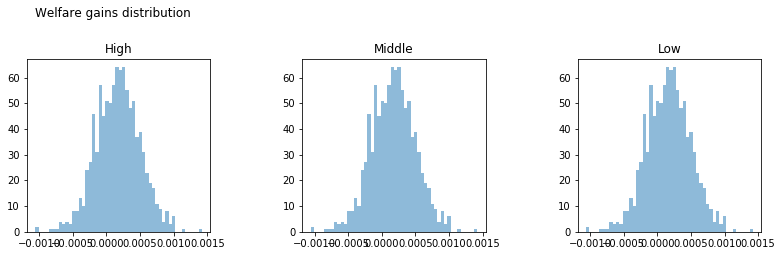

In [14]:
plt.figure
plt.subplots_adjust(top=0.8, bottom=0.2, left=0.3, right=2, wspace=0.5)
plt.suptitle('Welfare gains distribution')
bins=50 #Adjust the number of bins
plt.subplot(1,3,1)
plt.hist(g_h_n, bins, alpha=0.5)
plt.title('High')

plt.subplot(1,3,2)
plt.hist(g_m_n, bins, alpha=0.5)
plt.title('Middle')

plt.subplot(1,3,3)
plt.hist(g_l_n, bins, alpha=0.5)
plt.title('Low')
plt.show()

<h3>Q2.- Adding Seasonal Labor Supply. </h3>

In [15]:
%reset -sf

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools as it
import pandas as pd 
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

np.random.seed( 10 )
random.seed(10)

#Parameters
β=0.99
σ=0.2
σ_l=0.3
n=1000
T=40
M=12


#1.- Processes for LABOUR
#Permanent level of labour
log_u=np.random.normal(0,σ_l,n)
z_l = np.zeros((n))
for i in range(n):
    z_l[i]=np.exp(log_u[i])*np.exp(-σ_l/2)
    
#Idiosyncratic non-stationary stochastic component
log_e=np.random.normal(0,σ,(n,T))
l= np.zeros((n,T))
for i,t in it.product(range(n),range(T)):
    l[i,t]=np.exp(log_e[i,t])*np.exp(-σ_l/2)


#Seasonal risk (only one degree of seasonality)
#Deterministic component (low degree of seasonality of new table1)
g_l=[0.932,0.845, 1.076,1.070,1.047,1.030,1.018,1.018,1.018,1.001,0.984,0.961 ]

#Stochastic (low of table2)
s_l=[ 0.043,  0.034, 0.145,  0.142,  0.137,  0.137,  0.119,  0.102,  0.094,  0.094,  0.085,  0.068]

#Build the vectors
eps_l=np.zeros((M))
for m in range(M):
    eps_l[m]=np.random.normal(0,s_l[m],1)

s_labour=np.zeros((M))
for m in range(M):
    s_labour[m]=np.exp(-s_l[m]/2)*np.exp(eps_l[m])



#2.- Processes for CONSUMPTION (same as 1.2.)
#Permanent level of consumption
log_u=np.random.normal(0,σ,n)
z = np.zeros((n))
for i in range(n):
    z[i]=np.exp(log_u[i])*np.exp(-σ/2)

#Idiosyncratic non-stationary stochastic component
log_e=np.random.normal(0,σ,(n,T))
c = np.zeros((n,T))
for i,t in it.product(range(n),range(T)):
    c[i,t]=np.exp(log_e[i,t])*np.exp(-σ/2)
    

#Seasonal risk
#Deterministic component
g_middle=[-0.147, -0.370, 0.141,  0.131, 0.090, 0.058, 0.036, 0.036, 0.036, 0.002, -0.033,  -0.082]
g_high=[-0.293, -0.739, 0.282, 0.262, 0.180, 0.116, 0.072, 0.072, 0.072,0.004,-0.066,-0.164]
g_low=[-0.073, -0.185, 0.071, 0.066, 0.045, 0.029, 0.018, 0.018, 0.018, 0.001, -0.017, -0.041]

#Stochastic component
s_m=[0.085,0.068,0.290,0.283,0.273,0.273,0.239, 0.205,  0.188,0.188, 0.171,0.137]
s_h=[0.171, 0.137,0.580, 0.567, 0.546, 0.546,0.478,0.410,0.376,0.376,0.341,0.273]
s_l=[ 0.043,  0.034, 0.145,  0.142,  0.137,  0.137,  0.119,  0.102,  0.094,  0.094,  0.085,  0.068]

#Middle degree
eps_m=np.zeros((M))
for m in range(M):
    eps_m[m]=np.random.normal(0,s_m[m],1)

s_m=np.zeros((M))
for m in range(M):
    s_m[m]=np.exp(-s_m[m]/2)*np.exp(eps_m[m])
    
#High degree
eps_h=np.zeros((M))
for m in range(M):
    eps_h[m]=np.random.normal(0,s_h[m],1)

s_h=np.zeros((M))
for m in range(M):
    s_h[m]=np.exp(-s_h[m]/2)*np.exp(eps_h[m])

#Low degree
eps_l=np.zeros((M))
for m in range(M):
    eps_l[m]=np.random.normal(0,s_l[m],1)

s_l=np.zeros((M))
for m in range(M):
    s_l[m]=np.exp(-s_l[m]/2)*np.exp(eps_l[m])




#3.- UTILITY
#FROM CONSUMPTION
c_mt_middle = np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    c_mt_middle[i,m,t]=np.log(z[i]*np.exp(g_middle[m])*s_m[m]*c[i,t])

c_mt_high = np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    c_mt_high[i,m,t]=np.log(z[i]*np.exp(g_high[m])*s_h[m]*c[i,t])   

c_mt_low = np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    c_mt_low[i,m,t]=np.log(z[i]*np.exp(g_low[m])*s_l[m]*c[i,t])  



#From labour
#Dirty calibration
labour=np.zeros((n,M,T))
consumption=np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    labour[i,m,t]=z_l[i]*s_labour[m]*l[i,t]
    consumption[i,m,t]=z[i]*np.exp(g_middle[m])*s_m[m]*c[i,t]   
κ=1/(np.mean(labour)*np.mean(consumption))


#Desutility from labour
u_l=np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    u_l[i,m,t]=-κ*pow(labour[i,m,t],2)/2
    
#Total utility
u=c_mt_middle+u_l




#4.- LIFETIME WELFARE
w=np.zeros((n,M,T))
β1=np.zeros((T))
for t in range(T):
    β1[t]=pow(β,1/12)**(t*12)
total_β1=np.sum(β1)  
  
β2=np.zeros((M))
for m in range(M):
    β2[m]=pow(β,1/12)**(m-1)
total_β2=np.sum(β2)

a=np.zeros((n,T))   
welfare=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a[i,t]=np.sum(β2[m]*u[i,m,t])
            
        welfare[i]=np.sum(β1[t]*a[i,t])

total_welfare=np.sum(welfare)




#5.- WELFARE GAINS
#5.1. REMOVE SEASONALITY
c_mt_middle_n= np.zeros((n,T))
for i,t in it.product(range(n),range(T)):
    c_mt_middle_n[i,t]=np.log(z[i]*c[i,t])

u_l_n=np.zeros((n,T))
for i,t in it.product(range(n),range(T)):
    u_l_n[i,t]=-κ*z_l[i]*l[i,t]
    
#Total utility
u_n=c_mt_middle_n+u_l_n

#Welfare
a_n=np.zeros((n,T))   
welfare_n=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_n[i,t]=np.sum(β2[m]*u_n[i,t])
            
        welfare_n[i]=np.sum(β1[t]*a_n[i,t])

total_welfare_n=np.sum(welfare_n)



#5.2. DECOMPOSITION OF WELFARE EFFECTS
#Welfare W(c*, h) (w_nl)
#Total utility
#u_nl=c_mt_middle_n+u_l

#Step 1. Welfare: no-seasonality in consumption, but seasonality in labour
a_nl=np.zeros((n,T))   
welfare_nl=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_nl[i,t]=np.sum(β2[m]*c_mt_middle_n[i,t]+u_l[i,m,t])
            
        welfare_nl[i]=np.sum(β1[t]*a_nl[i,t])

total_welfare_nl=np.sum(welfare_nl)


#Welfare gain step 1
g_c=np.exp((welfare_nl-welfare)/(total_β2*total_β1)) - 1
g_total_c=np.exp((total_welfare_nl-total_welfare)/(total_β2*total_β1))-1



#Step 2. 
g_l=np.exp((welfare_n-welfare_nl)/(total_β2*total_β1)) - 1
g_total_l=np.exp((total_welfare_n-total_welfare_nl)/(total_β2*total_β1))-1


#Welfare gain without decomposition
g=np.exp((welfare_n-welfare)/(total_β2*total_β1)) - 1
g_total=np.exp((total_welfare_n-total_welfare)/(total_β2*total_β1))-1


array1=np.array([[round(total_welfare,2)],[round(total_welfare_nl,2)], [round(total_welfare_n,2)],[round(g_total_c,2)],[round(g_total_l,2)], [round(g_total,2)]])
table5=pd.DataFrame(array1, index = ['Welfare', 'Welfare Non-Seasonality C','Welfare Non-Seasonality','Welfare gains C', 'Welfare gains L', 'Total Welfare Gains'], columns = [''])
table5

,
Welfare,-541.40
Welfare Non-Seasonality C,-540.31
Welfare Non-Seasonality,-991.83
Welfare gains C,0.00
Welfare gains L,-0.68
Total Welfare Gains,-0.68


With the previous calibration of $\kappa$, all the gains comes from removing the seasonal component of labour. Notice that this is because $\kappa$ is quite high and overwheights the role of labour in the utility. Notice also that the welfare decreases when we remove the seasonality of labour. Now we repeat the exercise setting $\kappa$=0.03. 

In [18]:
#From labour
#Dirty calibration
κ=0.05    
labour=np.zeros((n,M,T))
consumption=np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    labour[i,m,t]=z_l[i]*s_labour[m]*l[i,t]
    consumption[i,m,t]=z[i]*np.exp(g_middle[m])*s_m[m]*c[i,t]   
#κ=1/(np.mean(labour)*np.mean(consumption))


#Desutility from labour
u_l=np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    u_l[i,m,t]=-κ*pow(labour[i,m,t],2)/2
    
#Total utility
u=c_mt_middle+u_l




#4.- LIFETIME WELFARE
w=np.zeros((n,M,T))
β1=np.zeros((T))
for t in range(T):
    β1[t]=pow(β,1/12)**(t*12)
total_β1=np.sum(β1)  
  
β2=np.zeros((M))
for m in range(M):
    β2[m]=pow(β,1/12)**(m-1)
total_β2=np.sum(β2)

a=np.zeros((n,T))   
welfare=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a[i,t]=np.sum(β2[m]*u[i,m,t])
            
        welfare[i]=np.sum(β1[t]*a[i,t])

total_welfare=np.sum(welfare)




#5.- WELFARE GAINS
#5.1. REMOVE SEASONALITY
c_mt_middle_n= np.zeros((n,T))
for i,t in it.product(range(n),range(T)):
    c_mt_middle_n[i,t]=np.log(z[i]*c[i,t])

u_l_n=np.zeros((n,T))
for i,t in it.product(range(n),range(T)):
    u_l_n[i,t]=-κ*z_l[i]*l[i,t]
    
#Total utility
u_n=c_mt_middle_n+u_l_n

#Welfare
a_n=np.zeros((n,T))   
welfare_n=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_n[i,t]=np.sum(β2[m]*u_n[i,t])
            
        welfare_n[i]=np.sum(β1[t]*a_n[i,t])

total_welfare_n=np.sum(welfare_n)



#5.2. DECOMPOSITION OF WELFARE EFFECTS
#Welfare W(c*, h) (w_nl)
#Total utility
#u_nl=c_mt_middle_n+u_l

#Step 1. Welfare: no-seasonality in consumption, but seasonality in labour
a_nl=np.zeros((n,T))   
welfare_nl=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_nl[i,t]=np.sum(β2[m]*c_mt_middle_n[i,t]+u_l[i,m,t])
            
        welfare_nl[i]=np.sum(β1[t]*a_nl[i,t])

total_welfare_nl=np.sum(welfare_nl)


#Welfare gain step 1
g_c=np.exp((welfare_nl-welfare)/(total_β2*total_β1)) - 1
g_total_c=np.exp((total_welfare_nl-total_welfare)/(total_β2*total_β1))-1



#Step 2. 
g_l=np.exp((welfare_n-welfare_nl)/(total_β2*total_β1)) - 1
g_total_l=np.exp((total_welfare_n-total_welfare_nl)/(total_β2*total_β1))-1


#Welfare gain without decomposition
g=np.exp((welfare_n-welfare)/(total_β2*total_β1)) - 1
g_total=np.exp((total_welfare_n-total_welfare)/(total_β2*total_β1))-1


array1=np.array([[round(total_welfare,2)],[round(total_welfare_nl,2)], [round(total_welfare_n,2)],[round(g_total_c,2)],[round(g_total_l,2)], [round(g_total,2)]])
table5=pd.DataFrame(array1, index = ['Welfare', 'Welfare Non-Seasonality C','Welfare Non-Seasonality','Welfare gains C', 'Welfare gains L', 'Total Welfare Gains'], columns = [''])
table5

,
Welfare,-158.91
Welfare Non-Seasonality C,-154.61
Welfare Non-Seasonality,-168.55
Welfare gains C,0.01
Welfare gains L,-0.03
Total Welfare Gains,-0.02


**Table 5** highlights a very interesting point: removing the seasonality from consumption is welfare-improving whereas removing it from labour is not. Thus, the total gains are negative, but there is a consumption labour trade-off behind they. This is why the decomposition is so important!

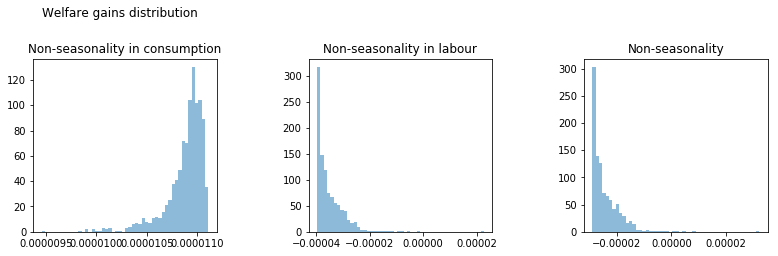

In [19]:
#Plot decomposition of welfare gains
plt.figure
plt.subplots_adjust(top=0.8, bottom=0.2, left=0.3, right=2, wspace=0.5)
plt.suptitle('Welfare gains distribution')
bins=50 #Adjust the number of bins
plt.subplot(1,3,1)
plt.hist(g_c,bins, alpha=0.5)
plt.title('Non-seasonality in consumption')

plt.subplot(1,3,2)
plt.hist(g_l,bins, alpha=0.5)
plt.title('Non-seasonality in labour')


plt.subplot(1,3,3)
plt.hist(g,bins, alpha=0.5)
plt.title('Non-seasonality')
plt.show()

The distribution of welfare gains is not homogenous again. Note that the welfare gains coming from non-seasonal consumption are skewed to the right whereas they are skewed to the left for non-seasonality in labour and overall. 

<br>


<h5>b) Assume a deterministic seasonal component and a stochastic seasonal component for labor supply both of which are highly **negatively correlated** with their consumption counterparts. Then, compute the welfare gains of removing seasons isolating the effects of consumption and leisure.
</h5>

In [13]:
# NEGATIVE SEASONAL CORRELATION 
#Seasonal risk (only one degree of seasonality)
#Deterministic component (low degree of seasonality of new table1 REARRANGED)
g_l=[1.07	, 1.076,	0.845,0.932, 0.961,0.984,1.001,1.018,1.018,1.018,1.047,1.07]
        
#Stochastic (low of table2)
s_l=[0.142,	0.145,	0.034,	0.043,	0.068,	0.085,	0.094,	0.094,	0.102,	0.119,	0.137,	0.137]
    
#Same code as before
#Build the vectors
eps_l=np.zeros((M))
for m in range(M):
    eps_l[m]=np.random.normal(0,s_l[m],1)

s_labour=np.zeros((M))
for m in range(M):
    s_labour[m]=np.exp(-s_l[m]/2)*np.exp(eps_l[m])

     
#Labour utility
u_l=np.zeros((n,M,T))
for i,m,t in it.product(range(n),range(12),range(T)):
    u_l[i,m,t]=-κ*z_l[i]*s_labour[m]*l[i,t]
    
#Total utility
u=c_mt_middle+u_l


#Welfare
w=np.zeros((n,M,T))
β1=np.zeros((T))
for t in range(T):
    β1[t]=pow(β,1/12)**(t*12)
total_β1=np.sum(β1)  
  
β2=np.zeros((M))
for m in range(M):
    β2[m]=pow(β,1/12)**(m-1)
total_β2=np.sum(β2)

a=np.zeros((n,T))   
welfare=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a[i,t]=np.sum(β2[m]*u[i,m,t])
            
        welfare[i]=np.sum(β1[t]*a[i,t])

total_welfare=np.sum(welfare)

#DECOMPOSITION OF WELFARE EFFECTS
#Welfare W(c*, h) (w_nl)
#Total utility
#u_nl=c_mt_middle_n+u_l

#Step 1. Welfare: no-seasonality in consumption, but seasonality in labour
a_nl=np.zeros((n,T))   
welfare_nl=np.zeros((n))         
for i in range(n):
    for t in range(T):
        for m in range(M):
            a_nl[i,t]=np.sum(β2[m]*c_mt_middle_n[i,t]+u_l[i,m,t])
            
        welfare_nl[i]=np.sum(β1[t]*a_nl[i,t])

total_welfare_nl=np.sum(welfare_nl)


#Welfare gain step 1
g_c=np.exp((welfare_nl-welfare)/(total_β2*total_β1)) - 1
g_total_c=np.exp((total_welfare_nl-total_welfare)/(total_β2*total_β1))-1



#Step 2. 
g_l=np.exp((welfare_n-welfare_nl)/(total_β2*total_β1)) - 1
g_total_l=np.exp((total_welfare_n-total_welfare_nl)/(total_β2*total_β1))-1

#Welfare gain without decomposition
g=np.exp((welfare_n-welfare)/(total_β2*total_β1)) - 1
g_total=np.exp((total_welfare_n-total_welfare)/(total_β2*total_β1))-1


array1=np.array([[round(total_welfare,2)],[round(total_welfare_nl,2)], [round(total_welfare_n,2)],[round(g_total_c,2)],[round(g_total_l,2)], [round(g_total,2)]])
table6=pd.DataFrame(array1, index = ['Welfare', 'Welfare Non-Seasonality C','Welfare Non-Seasonality','Welfare gains C', 'Welfare gains L', 'Total Welfare Gains'], columns = [''])
table6

NameError: name 'κ' is not defined

**Table 6**

With negative correlated seasonal components the results are quite different:
- Removing consumption seasonality is welfare improving but now also removing labour seasonality is. 
- Overall welfare gains are positive.
- Welfare gains are equally distributed between the consumption and labour components. The trade-off identified before disappears. 

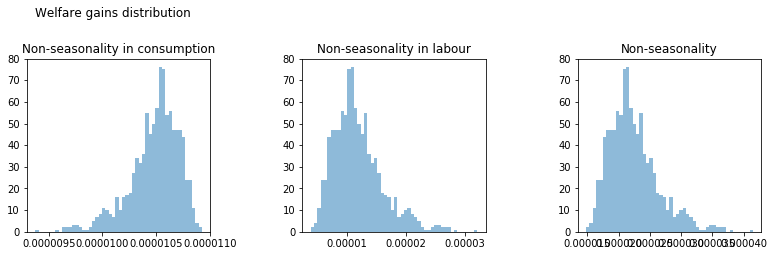

In [22]:
plt.figure
plt.subplots_adjust(top=0.8, bottom=0.2, left=0.3, right=2, wspace=0.5)
plt.suptitle('Welfare gains distribution')
bins=50 #Adjust the number of bins
plt.subplot(1,3,1)
plt.hist(g_c,bins, alpha=0.5)
plt.title('Non-seasonality in consumption')

plt.subplot(1,3,2)
plt.hist(g_l,bins, alpha=0.5)
plt.title('Non-seasonality in labour')


plt.subplot(1,3,3)
plt.hist(g,bins, alpha=0.5)
plt.title('Non-seasonality')
plt.show()

The distribution of gains across agents is much less skewed than before. 


<br>
<br>

<h5>
(c) How do your answers to (a) and (b) change if the nonseasonal stochastic component of consumption and leisure are correlated?
</h5>
They follow exactly the same process $(Normal (0, \sigma)$, with different sigmas. As a consequence, they are already positively correlated. 